In [1]:
%pylab inline
from LMC_hernquist_a import a_value
from soda import profiles
from pygadgetreader import readsnap
from astropy import units as u
from astropy import constants

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [12]:
font = {'size':18}
matplotlib.rc('font', **font)

In [3]:
# Mass models:
Mass = [3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11]
# Enclosed Mass:
M_tot = 1.7E10

In [4]:
# Findig the scale length
a = zeros(len(Mass))
for i in range(len(Mass)):
    a[i] = (a_value(Mass[i], M_tot))

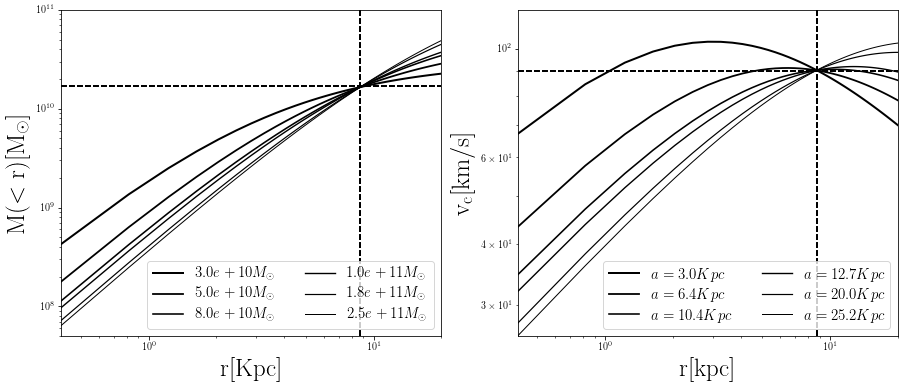

In [5]:
figsize(15,6)
r = np.linspace(0, 20)
for i in range(len(a)):
    M_r = profiles.mass_hernquist(a[i], r, Mass[i])
    v_r = profiles.vc_hernquist(a[i], r, 0, 0, Mass[i])
    subplot(1,2,1)
    loglog(r, M_r, c='k', lw=2-i/5.0, label='${:.1e} M_\odot$'.format(Mass[i]))
    axvline(8.7, ls='--', c='k')
    axhline(1.7E10, ls='--', c='k')
    xlim(0, 20)
    ylim(5E7, 1E11)
    xlabel('$\mathrm{r[Kpc]}$', fontsize=25)
    ylabel('$\mathrm{M(<r)[M_{\odot}]}$', fontsize=25)
    legend(ncol=2, fontsize=15, loc='lower right')
    
    subplot(1,2,2)
    loglog(r, v_r, c='k', lw=2-i/5.0, label='$a = {:.1f}Kpc$'.format(a[i]))
    axvline(8.7, ls='--', c='k')
    axhline(90, ls='--', c='k')
    xlim(0, 20)
    ylim(0, 120)
    legend(ncol=2, fontsize=15, loc='lower right')
    xlabel('$\mathrm{r[kpc]}$', fontsize=25)
    ylabel('$\mathrm{v_c[km/s]}$', fontsize=25)
savefig('LMC_models.png', dpi=100, bbox_inches='tight')

# Models from the N-body models

## GalIC ICs:

In [6]:
G = constants.G
H = 2.26854550263E-18 /u.s

def ICs(Mvir, a_halo):
    Mvir = Mvir * u.Msun
    a_halo = a_halo * u.kpc
    Vvir = ((Mvir*(6.9713 * H*G) )**(1/3.)).to(u.km / u.s)
    print('Vvir = ', Vvir)

    Rvir = (Vvir/(6.9713 * H)).to(u.kpc)
    print('Rvir = ', Rvir)

    CC = Rvir/a_halo
    print('CC = ', CC)

In [7]:
ICs(1E11, 12.7)

Vvir =  59.42797980032075 km / s
Rvir =  121.78089309083585 kpc
CC =  9.589046700065815


| LMC mass      | $V_{vir}\ (km/s) $      | $CC$  | 
| :-------------: |:--------------------:| :-----:| 
| MWLMC1 ($3\times10^{10} M_{\odot}$) | 39.78 | 27.17  | 
| MWLMC2 ($5\times10^{10} M_{\odot}$) | 47.17 | 15.10 |
| MWLMC3 ($8\times10^{10} M_{\odot}$) | 55.17 | 10.87  | 
| MWLMC4 ($10\times10^{10} M_{\odot}$) | 59.43 | 9.58 | 
| MWLMC5 ($18\times10^{10} M_{\odot}$) | 72.29 | 7.40 | 
| MWLMC6 ($25\times10^{10} M_{\odot}$) | 80.66 | 6.55 |

## LMC1 

In [8]:
vc3 = np.loadtxt('LMC3_rotcurve.txt', skiprows=1)
vc4 = np.loadtxt('LMC4_rotcurve.txt', skiprows=1)
vc5 = np.loadtxt('LMC5_rotcurve.txt', skiprows=1)
vc6 = np.loadtxt('LMC6_rotcurve.txt', skiprows=1)


    

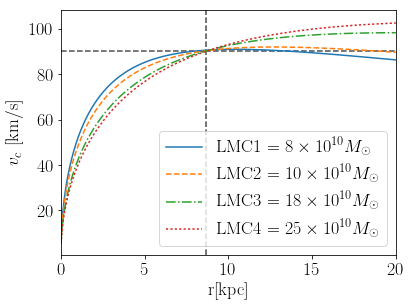

In [27]:
figure(figsize=(6,4.5))
axvline(8.7, ls='--', c='k', alpha=0.7)
axhline(90, ls='--', c='k', alpha=0.7)
plot(vc3[:,0], vc3[:,1], ls='-', label=r'$\mathrm{LMC1}=8 \times 10^{10}M_{\odot}$')
plot(vc4[:,0], vc4[:,1], ls='--', label=r'$\mathrm{LMC2}=10 \times 10^{10}M_{\odot}$')
plot(vc5[:,0], vc5[:,1], ls='-.', label=r'$\mathrm{LMC3}=18 \times 10^{10}M_{\odot}$')
plot(vc6[:,0], vc6[:,1], ls=':', label=r'$\mathrm{LMC4}=25 \times 10^{10}M_{\odot}$')
xlim(0, 20)
xlabel('$\mathrm{r [kpc]}$', fontsize=18)
ylabel('$v_c$ $\mathrm{ [km/s]}$', fontsize=18)
legend(fontsize=18)

#v_rLMC1 = profiles.vc_hernquist(a[2], r, 0, 0, Mass[2])
#plot(r, v_rLMC1)
savefig('../../MW_anisotropy/figures/LMC_rot_curves.pdf', bbox_inches='tight', dpi=150)
savefig('../../MW_anisotropy/figures/LMC_rot_curves.png', bbox_inches='tight', dpi=150)
